In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import timeit
## Plotly
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings
warnings.filterwarnings('ignore')

main_start_time = timeit.default_timer()

## Import the DataSet and make a copy

In [2]:
aer=pd.read_csv("aerofit_treadmill.csv")
aer_org=aer.copy()
aer

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Check the Data Frames Attributes

In [3]:
print("Data Frmae has",aer.shape[0],"rows and ",aer.shape[1]," Columns")
aer.describe(include='O')

NumExpr defaulting to 8 threads.


Data Frmae has 180 rows and  9  Columns


,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [4]:
aer.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Describe the Columns values
1. It has three production KP281 ,KP481 KP781 with price 1500 , 1750 and 2500 in same order 
1. KP281 jas frequency of 80 , Male has 104 Frequency and 107 Partnered 
1. The data set is of US so it Single or Partnered(Living or married ) 
1. Geneder has 2 Unique value and Same is case for MaritialStatus
1. The treadmill is used by People of Different Age , Male and Female.
1. Education Columns Talks about number of year of education for different Indiviual 
1. Self Fitness rating between 1-5 1 Least and 5 Highest 
1. Income shows in Income in Dollar for Indiviual 
1. The average number of miles the customer expects to walk/run each week

## Checking Duplicate , Null values.

In [5]:
temp = aer[aer.duplicated()]
print(" From the Above Code we can see there are no Duplicate Values")
print(" \n")
del temp
aer.info()

 From the Above Code we can see there are no Duplicate Values
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Description
1. There No Null values in the Dataset 
1. Product , Gender and Martial Status are object columns rest are integer.
1. Age mean and Median is close so we can Age is Slighly right skewed but we can say is even distributed
1. Education is Evenly spread with Mean and 50% data almost eqal to same 
1. Usage is slight diferrent data is evenly spread
1. Usage is slightly right skewed but differene in not high , 25 50% are all equal to 3 
1. Income is uneven distributed and standard deviation shows the spread is also high .
1. Miles data has high variation . 

## Drawing Stats using Histogram from Various Columns

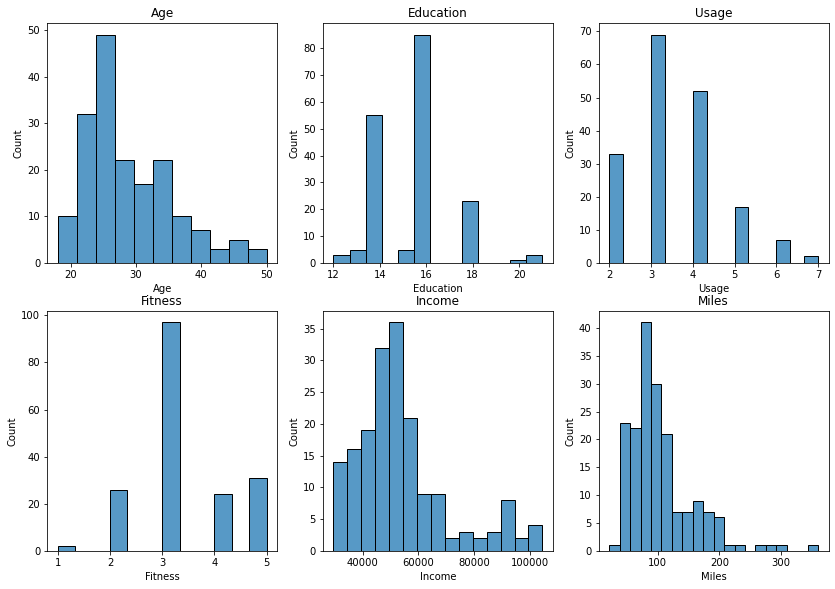

In [6]:
L1=aer.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(14,15))
plt.subplot(3,3,1)

for i in range(0,6):
    plt.subplot(3,3,i+1)
    #aer[L1[i]].hist()
    sns.histplot(aer[L1[i]])
    plt.title(L1[i])
    
plt.show()
 

## Describtion
1. Age Columns is maximum spread between 20 and 30 
1. Education has 16 maximum number which mean mostly people are graduate along 14 Year which is either undergraduate
1. Usage of 3 times in a weeks time . 
1. Peopl have peak fitness of 3 followd by 5
1. Income is highest spread between 20,000 to 60000 dollars
1. Miles Covered walking running is higesht between 10-100 miles

In [7]:
import plotly.express as px
# plotting the bubble chart
fig = px.scatter(aer, x="Age", y="Fitness",size="Miles", color="Product",title=" Age and Fitness Level with Different Product ")
# showing the plot
fig.show()

### Describtion
1. People with 5 Fitness level are all Using KP781 which is the most expensive one 
1. Fitness level 3 uses all machine with KP481 being highest . 
1. People at fitsness level 2 mostly uses KP281 

## Adding Columns in Dataset for Further Analaysis 

In [8]:
## Adding new columns for price . 
price_trade = {'KP281':1500, 'KP481':1750, 'KP781':2500}
aer['price'] = aer['Product'].apply(lambda x: price_trade.get(x))
aer['km_month']=round(aer['Miles']*1.6,2)
aer['km_month']=aer['km_month']*4.2
aer['km_month']=aer['km_month'].astype(int)

## Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

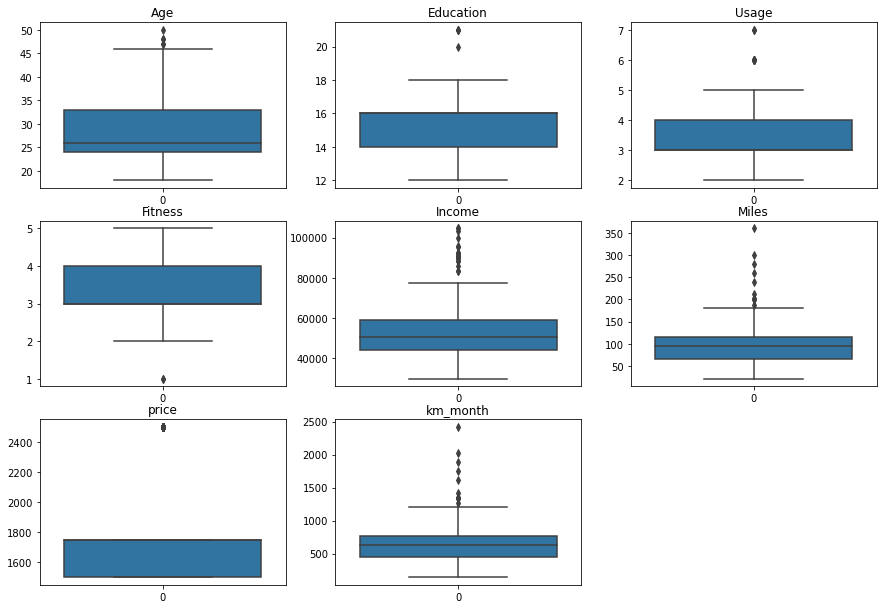

In [9]:
L1=aer.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,14))
plt.subplot(4,3,1)
for i in range(0,len(L1)):
    plt.subplot(4,3,i+1)
    plt.title(L1[i])
    sns.boxplot(data=aer[L1[i]])
plt.show()

In [10]:
aer.iplot(kind='box',title='Box Plot of Various Value Hover around to See values',)

### OBservations
1. Boxplots shows values Minimum maximum and outliers . 
1. Age Column has Median 26 it also has outliers upper bound(Q3 +1.5IQR ) which is value above 46.5 value , it has number of outliers 
1. Education Columns has Median 16 and upper bound outliers over 19
1. Usage Columns has Median of 3 has upper bound outliers greater than 5.5
1. Fitness Median is 3 and Lower Bound Outliers less than 1.5 
1. Income has high number of outliers value in upper bound greater than 80581.8 
1. KM_month is derived from Miles per week has multuple outliers value in upper bound greater than 1262
1. Price has 3 values so the 3 Machine is valued at 2500 is an outlier.

### Below Data Frame When Called return the Data frame with  quartile1 ,2 ,3 Inter Quartile Range , Lower Bound , Upper Bound Which is nothing but outliers above Lower and Upper bound



In [11]:
## Data Frame which takes input as dataframe and return the columns with numeric value as dataframe to detect outliers 
def Quartile(df):
    L1=df.select_dtypes(include=np.number).columns.tolist()
    df1=pd.DataFrame(columns=['Q1','Q2(Median)','Q3','IQR','Lower_Bound','Upper_Bound'],index=L1)
    
    for i in range(len(df1.index)):    
        q1 = round(df[L1[i]].quantile(0.25),1)
        q2 = round(df[L1[i]].quantile(0.50),1)
        q3 = round(df[L1[i]].quantile(0.75),1)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)   

        df1.iloc[i]=[q1,q2,q3,iqr,lower_bound,upper_bound]
        #return (q1,q2,q3,iqr,lower_bound,upper_bound)
        #df1=df1.astype(int)
    return df1

In [12]:
df=Quartile(aer)
df.reset_index()
df

,Q1,Q2(Median),Q3,IQR,Lower_Bound,Upper_Bound
Age,24.0,26.0,33.0,9.0,10.5,46.5
Education,14.0,16.0,16.0,2.0,11.0,19.0
Usage,3.0,3.0,4.0,1.0,1.5,5.5
Fitness,3.0,3.0,4.0,1.0,1.5,5.5
Income,44058.8,50596.5,58668.0,14609.2,22145.0,80581.8
Miles,66.0,94.0,114.8,48.8,-7.2,188.0
price,1500.0,1750.0,1750.0,250.0,1125.0,2125.0
km_month,443.0,631.0,770.8,327.8,-48.7,1262.5


## Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

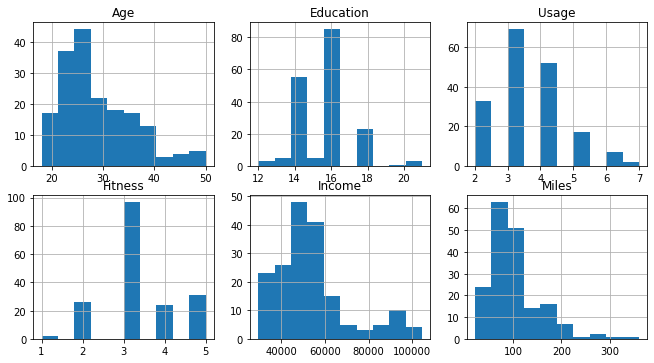

In [13]:
df=aer.drop(columns={'Gender','MaritalStatus','Product'})
cols=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
plt.figure(figsize=(11,9))
plt.subplot(3,3,1)

for i in range(0,6):
    plt.subplot(3,3,i+1)
    df[cols[i]].hist()
    plt.title(cols[i])
plt.show()

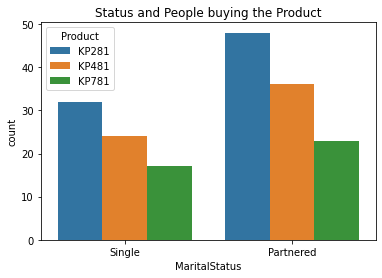

In [14]:
sns.countplot(data=aer,x='MaritalStatus',hue='Product')
plt.title("Status and People buying the Product")
plt.show()


### Observation 
1. More are buying the cheaper product with is KP281
1. KP481 is second Popular 
1. Partnered people are buying more tread mill and should be the focus area

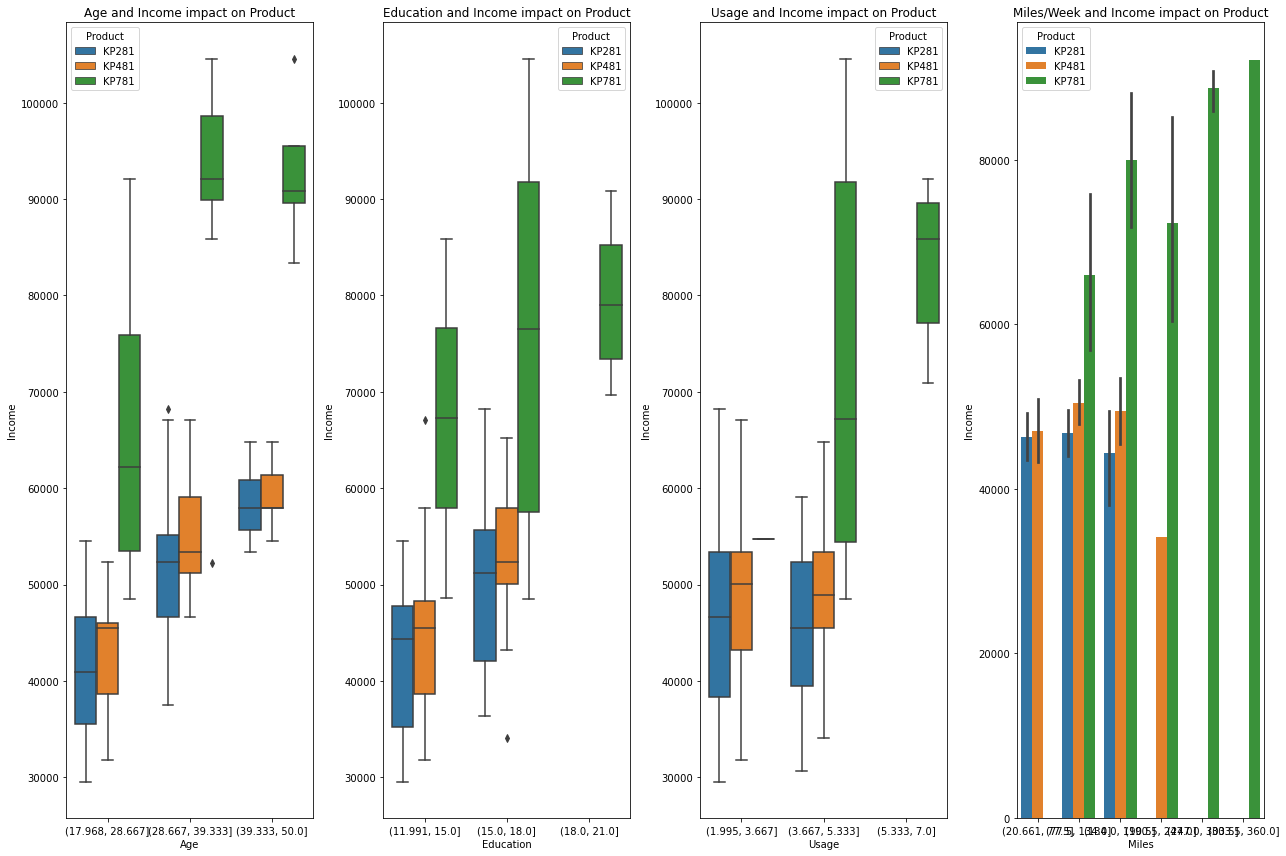

In [15]:
#plt.figure(figsize=(10,12))
fig, axs = plt.subplots(ncols=4,figsize=(18,12))
## Plot 1
sns.boxplot(data=aer,x=pd.cut(aer['Age'], bins = 3),y='Income',hue='Product',ax=axs[0])
axs[0].set_title("Age and Income impact on Product")

## Plot 2 

sns.boxplot(data=aer,x=pd.cut(aer['Education'], bins = 3),y='Income',hue='Product',ax=axs[1])
axs[1].set_title("Education and Income impact on Product")


sns.boxplot(data=aer,x=pd.cut(aer['Usage'], bins = 3),y='Income',hue='Product',ax=axs[2])
axs[2].set_title("Usage and Income impact on Product")


sns.barplot(data=aer,x=pd.cut(aer['Miles'], bins = 6),y='Income',hue='Product',ax=axs[3])
axs[3].set_title("Miles/Week and Income impact on Product")

plt.tight_layout()
plt.show()

### Observations
1. People at High Income Group across all Age prefer to buy the KP781 or spend more money on treadmill.
1. People with Education Higher prefer the KP781 Product 
1. In case of Eduction 18 and Above all prefer only KP781 Prodiuct
1. People with Usage between 2-4 Prefer KP481 and Kp281 , There is potential to sell expensive product to these people
1. If Usage goes above 3 , People in Higher income in the category prefer KP781 product
1. Those running Higher Miles and Having Higher Income in same category prefer KP781 Product . 
1. In Case of Miles per week greater in 247 all prefer all KP781 
1. People with Miles in range of 134-247 has equal preference for KP281 and KP481 , those using KP281 can be potential customers for KP481

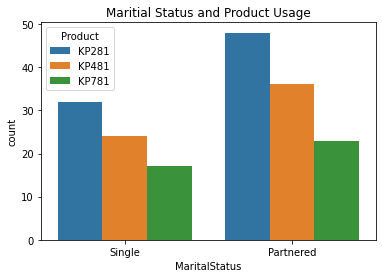

In [16]:
sns.countplot(data=aer,x='MaritalStatus',hue='Product')
plt.title("Maritial Status and Product Usage")
plt.show()

### Observations
1. Singles and Partnered have high count for KP281 
1. KP481 is Slightly less popular and can be potential to seel the product to both single and Partnered

## Cross Tab Function to Shows Number and Probability of Various items

In [17]:
pd.crosstab(aer.Product,aer.Gender,margins=True).iplot(kind='barh',title="Total Count of Different Product in Male and Female",yTitle="Product",xTitle="Count")
pd.crosstab(aer.Product,aer.Gender,margins=True,normalize=True)


Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


### Observations
1. KP281 is Equally Popular in Male and Females i.e both are equally probable to buy KP281 in case of KP481 the chances 
1. Expensive products KP481 and Kp781 is more popular in Males as compared to Females its 16% to 17% 
1. In case of KP781 the chances of Males buys it is 18% as compare to 3% for Females
1. Females use very less KP781 the problem can be identified to bring more sales in this category

In [18]:
pd.crosstab(aer.Product,pd.cut(aer['Age'], bins = 3)).iplot(kind='bar', xTitle='Product',title='   Age in different Products',yTitle='Age')
pd.crosstab(aer.Product,pd.cut(aer['Age'], bins = 3),normalize=True)

Age,"(17.968, 28.667]","(28.667, 39.333]","(39.333, 50.0]"
Product,,,
KP281,0.277778,0.127778,0.038889
KP481,0.177778,0.127778,0.027778
KP781,0.138889,0.055556,0.027778


### Observation
1. KP281 is More popular in with 27% people using it in 18-28 Age Group
1. KP481 is approx 18% usage in 18-28 Age Group 
1. KP281 and KP481 has equal usage in 28-39 Age group people using KP281 can be pitched KP481 Product

In [19]:
pd.crosstab(aer.Product,pd.cut(aer['Education'], bins = 3)).iplot(kind='bar', title='   Education in different Products',yTitle='Education',xTitle='Product')
pd.crosstab(aer.Product,pd.cut(aer['Education'], bins = 3))

Education,"(11.991, 15.0]","(15.0, 18.0]","(18.0, 21.0]"
Product,,,
KP281,39,41,0
KP481,27,33,0
KP781,2,34,4


In [20]:
pd.crosstab(aer.Product,aer.MaritalStatus,margins=True).iplot(kind='bar', title='   MaritalStatus in different Products',yTitle='MaritalStatus',xTitle='Product')
pd.crosstab(aer.Product,aer['MaritalStatus'],normalize=True,margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


### Observations
1. People with Partner has High Percentage usage across all three Product 
1. Single has highest percentage of people using KP281 a potentail area to add more numbers 
1. Partnered people account FOR 60% OF aLL Machines

In [21]:
pd.crosstab(aer.Product,aer.Usage,margins=True).iplot(kind='bar', title='   Usage in different Products',yTitle='Usage Hours',xTitle='Product')
pd.crosstab(aer.Product,aer['Usage'],normalize=True,margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000,0.333333
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111,0.222222
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111,1.000000


## Observations
1. KP281 is popular among people with less then 5 Hours of Weekly Usage
1. KP481 is is Popular with People using for 3 Hours in week
1. People with High usage prefers KP781 which may be due to high durability and comfort

In [22]:
pd.crosstab(aer.Product,pd.cut(aer['Fitness'], bins = 5)).iplot(kind='bar', title='   Fitness and Products',yTitle='Fitness Level',xTitle='Product')
pd.crosstab(aer.Product,aer['Fitness'],normalize=True,margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


### Observations 
1. Fitness Level of 5 people uses 16%
1. With Increase fitness level the KP481 is tend to reduced except for fitness level 5 
1. Fitness  1 and 2 are not using KP781 meaning people tend to be educated about the product 

In [23]:
pd.crosstab(aer.Product, pd.cut(aer['Income'], bins = 6),).iplot(kind='bar', title='   Income and Products',yTitle='Income Level',xTitle='Product')
pd.crosstab(aer.Product,pd.cut(aer['Income'], bins = 6),normalize=True)

Income,"(29486.981, 42065.167]","(42065.167, 54568.333]","(54568.333, 67071.5]","(67071.5, 79574.667]","(79574.667, 92077.833]","(92077.833, 104581.0]"
Product,,,,,,
KP281,0.150000,0.194444,0.088889,0.011111,0.000000,0.00
KP481,0.061111,0.200000,0.066667,0.005556,0.000000,0.00
KP781,0.000000,0.044444,0.044444,0.027778,0.055556,0.05


### Observations 
1. KP281 is approx 20% usage in 42-54K Income Group
1. KP781 is Similar usage in 29-42 and 42-54 Age group
1. KP781 is used 5% of time 92K+ income group there is no other Product used in High Income Group , Similar is for 79-92 Income group

In [24]:
pd.crosstab(aer.Product, pd.cut(aer['Miles'], bins = 6)).iplot(kind='bar', title='   Miles and Products',yTitle='Miles Per Week',xTitle='Product')
pd.crosstab(aer.Product,pd.cut(aer['Miles'], bins = 6),normalize=True)

Miles,"(20.661, 77.5]","(77.5, 134.0]","(134.0, 190.5]","(190.5, 247.0]","(247.0, 303.5]","(303.5, 360.0]"
Product,,,,,,
KP281,0.211111,0.211111,0.022222,0.000000,0.000000,0.000000
KP481,0.116667,0.200000,0.011111,0.005556,0.000000,0.000000
KP781,0.000000,0.066667,0.094444,0.038889,0.016667,0.005556


### Observations 
1. KP281 is Same usage for Miles 20-77 and 77-134 
1. KP281 is not uses when weekly miles goes above 190
1. KP781 is only product for High Miles from 247 -303 and 303 and above 

## Correlation of Different Variables

<AxesSubplot:>

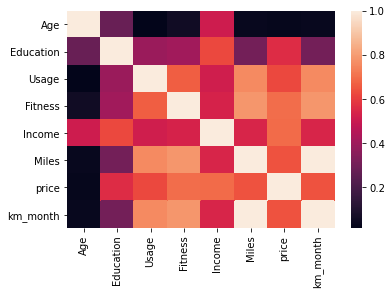

In [25]:
sns.heatmap(aer.corr())

In [26]:
aer.corr()

,Age,Education,Usage,Fitness,Income,Miles,price,km_month
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263,0.036635
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463,0.307397
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124,0.759119
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616,0.785779
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847,0.543558
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923,1.000000
price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000,0.644047
km_month,0.036635,0.307397,0.759119,0.785779,0.543558,1.000000,0.644047,1.000000


### Observations : 
1. Age is has High Correlation with Income 
1. Education and Income , Fitness and Prices has High Correlation
1. Usage is Fitness is high Correlated which is natural 
1. Income and Miles are interelated
1. Price shows highess correlation with Income and Fitness
1. Miles is high correlated Fitness level

## Pairt Plot of Different Columns

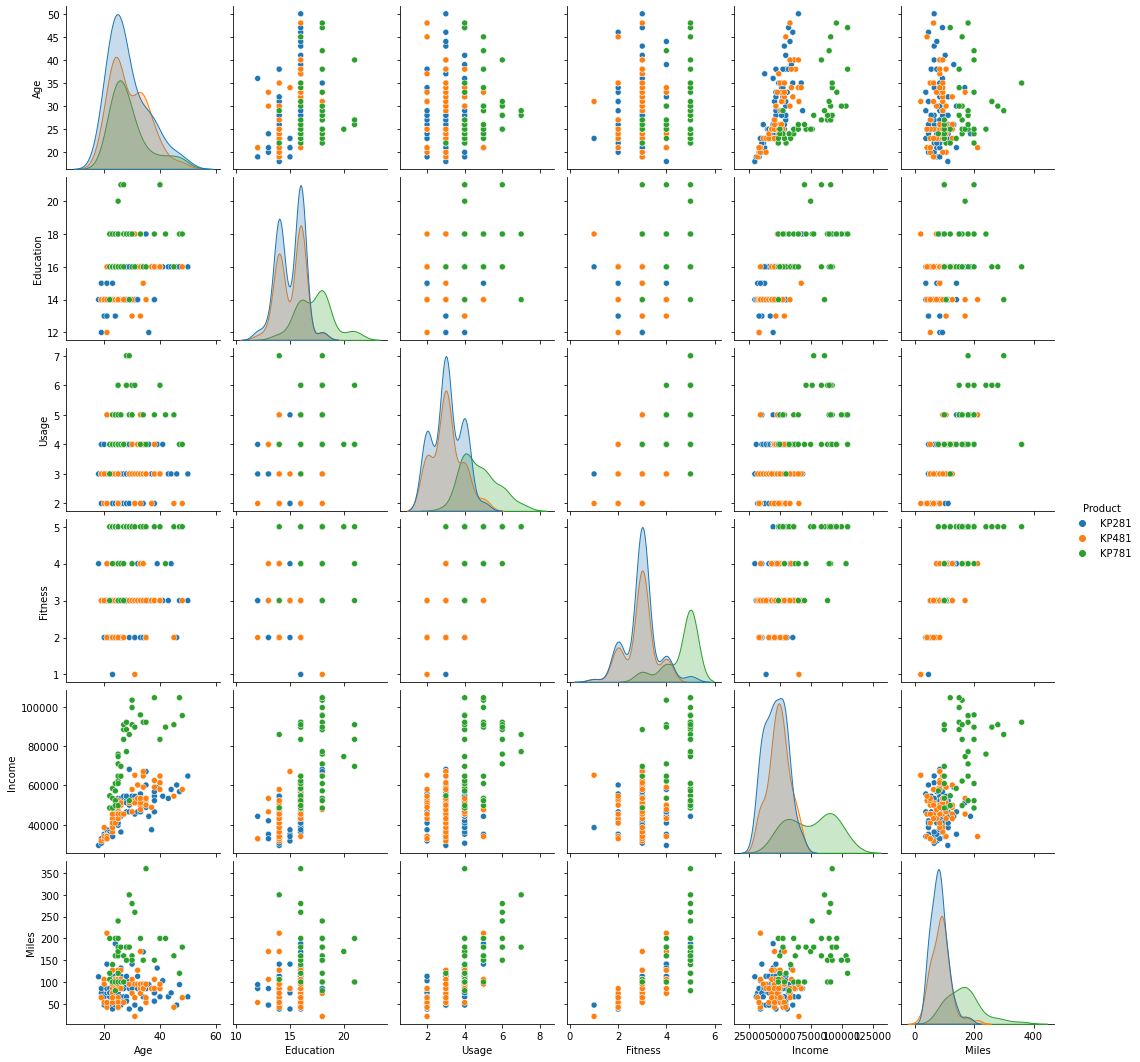

In [27]:
sns.pairplot(aer_org,hue='Product')

### Observations 
1. Miles and Age shows High value for KP281 and KP481 
1. Higher Educatated Peopled tend to use KP781
1. As Usage Increase People tend to switch to KP781
1. People with High Fitness Level also uses KP781
1. People With low and Middle income uses KP281 and KP481 more than KP781

In [28]:
elapsed = round(timeit.default_timer() - main_start_time,2)
print("Total Time Taken in Running the Notebook in Minutes :",round(elapsed/60,2))

Total Time Taken in Running the Notebook in Minutes : 0.28


## Conclusion : Interesting Case Study
1. More time Needed for further analysis